# Channel Generation for Dual Mobility Scenarios in 5G and Beyond

The 5G networks are designed to support scenrios where both transmitter and receiver are moving. Such scenarios are very common in device to device (D2D) and vehicle to everything (V2X) use-cases. The dual mobility results in dual Doppler primarily because of the relative motion between the two mobile devices. Ths tutorial demonstates, how wireless channel can be generated for such scerarios.

The tutorial covers the following

- [Import Libraries](#Import-Libraries)
    - [Import Python Libraries](#Import-Python-Libraries)
    - [Import 5G Libraries](#Import-5G-Libraries)
- [Simulation Parameters](#Simulation-Parameters)
- [Generate Antenna Array](#Generate-Antenna-Array)
    - [Generate Transmit Arrays](#Generate-Transmit-Arrays)
    - [Generate Receiver Arrays](#Generate-Receiver-Arrays)
- [Generate the Routes](#Generate-the-Routes)
    - [Generate the BS Routes](#Generate-the-BS-Routes)
    - [Generate the UE Routes](#Generate-the-UE-Routes)
- [Simulation Layout](#Simulation-Layout)
- [Channel Parameters, Channel Coefficients and OFDM Channel](#Channel-Parameters,-Channel-Coefficients-and-OFDM-Channel)
- [Variation in Channel Power across Time](#Variation-in-Channel-Power-across-Time)

Lets start the tutorial.


    
## Import Libraries
### Import Python Libraries

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# %matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np

### Import 5G Libraries

In [2]:
# importing necessary modules for simulating channel model
import sys
sys.path.append("../../../")
from toolkit5G.ChannelModels import NodeMobility
from toolkit5G.ChannelModels import AntennaArrays
from toolkit5G.ChannelModels import SimulationLayout

## Simulation Parameters

In [3]:
# Simulation Parameters
propTerrain      = "UMi"         # Propagation Scenario or Terrain for BS-UE links
carrierFrequency = 5.4*10**9     # carrier frequency in Hz
nBSs             = 3             # number of BSs 
nUEs             = 10            # number of UEs 
nSnapShots       = 14            # number of SnapShots

## Generate Antenna Array

### Generate Transmit Arrays

The following steps describe the procedure to generate AntennaArrays Objects at a single carrier frequency both at Tx and Rx side:

* Choose an omni directional dipole antenna for Rx, for which we have to pass the string "OMNI" while instantiating `AntennaArrays` class.

* Pass `arrayStructure` of `[1,1,2,2,1]` meaning 1 panel in vertical direction, 1 panel in horizonatal direction, 2 antenna elements per column per panel, 2 columns per panel and 1 correspond to antenna element being single polarized. 

* For this antenna structure, the number of Rx antennas `Nr` to be 4.


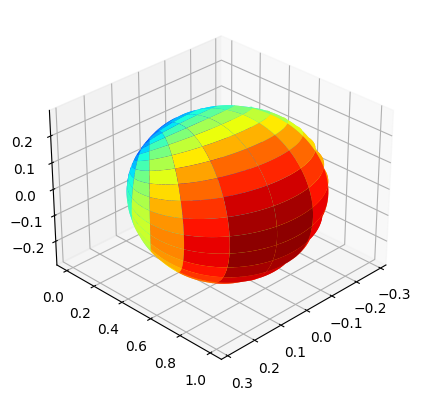

(<Figure size 960x480 with 1 Axes>, <Axes3D: >)

In [4]:
# Antenna Array at UE side
# antenna element type to be "OMNI"
# with single panel and 4 single polarized antenna element per panel.
bsAntArray = AntennaArrays(antennaType = "3GPP_38.901", 
                           centerFrequency = carrierFrequency,
                           arrayStructure  = np.array([1,1,2,2,1]))
                            
bsAntArray()

# num of Rx antenna elements
nt = bsAntArray.numAntennas
# Radiation Pattern of Rx antenna element 
bsAntArray.displayAntennaRadiationPattern()

### Generate Receiver Arrays

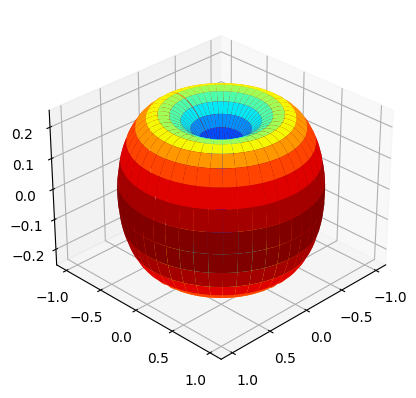

(<Figure size 960x480 with 1 Axes>, <Axes3D: >)

In [5]:
# Antenna Array at UE side
# antenna element type to be "OMNI"
# with single panel and 4 single polarized antenna element per panel.
ueAntArray = AntennaArrays(antennaType = "OMNI", 
                           centerFrequency = carrierFrequency,
                           arrayStructure  = np.array([1,1,2,2,1]))
                            
ueAntArray()

# num of Rx antenna elements
nr = ueAntArray.numAntennas
# Radiation Pattern of Rx antenna element 
ueAntArray.displayAntennaRadiationPattern()

## Generate the Routes

### Generate the BS Routes

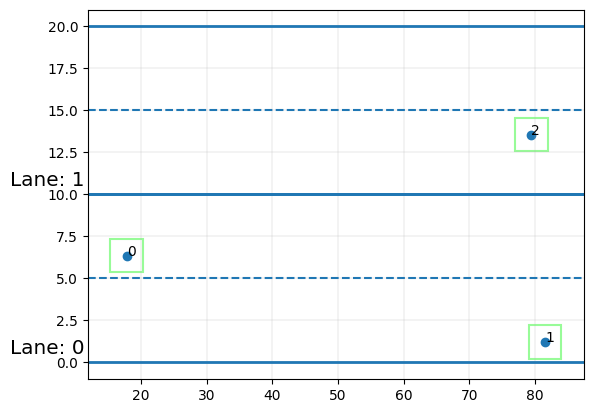

In [6]:
# NodeMobility parameters
# assuming that all the BSs are static and all the UEs are mobile.
# time values at each snapshot.

snapshotInterval = 10**-3/14     # 5 second

speed      = 0.833 # speed of the UE 3 Kmph
radius     = 250   # 3 Kmph
timeInst   = snapshotInterval*np.arange(nSnapShots, dtype=np.float32) 

typeOfMobility = "vehicle"
numVehicles    = nBSs
timeInstances  = timeInst
option         = "optionA"
laneWidth      = 10
numLanes       = 2
vehicledropType = "random"
randomizeOrientations = False

BSroute    = NodeMobility(typeOfMobility, numVehicles, timeInstances, option, 
                          laneWidth, numLanes, vehicledropType, randomizeOrientations)
BSroute()
BSroute.displayRoute()
# ax.set_aspect(True)


### Generate the UE Routes

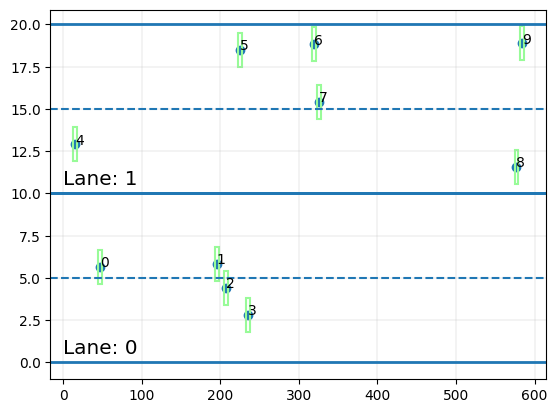

In [7]:
# NodeMobility parameters
# assuming that all the BSs are static and all the UEs are mobile.
# time values at each snapshot.

snapshotInterval        = 10**-3/14     # 5 second

speed      = 0.833 # speed of the UE 3 Kmph
radius     = 250   # 3 Kmph
timeInst   = snapshotInterval*np.arange(nSnapShots, dtype=np.float32) 

typeOfMobility = "vehicle"
numVehicles    = nUEs
timeInstances  = timeInst
option         = "optionA"
laneWidth      = 10
numLanes       = 2
vehicledropType = "random"
randomizeOrientations = False

UEroute    = NodeMobility(typeOfMobility, numVehicles, timeInstances, option, 
                          laneWidth, numLanes, vehicledropType, randomizeOrientations)
UEroute()
UEroute.displayRoute()
# ax.set_aspect(True)


## Simulation Layout

We define the simulation topology parametes:

 - ``ISD``: Inter Site Distance
 - ``minDist``: Minimum distance between transmitter and receiver.
 - ``bsHt``: BS heights 
 - ``ueHt``: UE heights
 - ``topology``: Simulation Topology
 - ``nSectorsPerSite``: Number of Sectors Per Site
 
Furthermore, users can access and update following parameters as per their requirements for channel using the handle simLayoutObj.x where x is:

 - The following parameters can be accessed or updated immendiately after object creation
    - ``UEtracks``
    - ``UELocations``
    - ``ueOrientation``
    - ``UEvelocityVector``
    - ``BStracks``
    - ``BSLocations``
    - ``bsOrientation``
    - ``BSvelocityVector``
    
 - The following parameters can be accessed or updated after calling the object
    - ``linkStateVec``
    

      enableSpatialConsistency: True
               memoryEfficient: False
enableSpatialConsistencyIndoor: True


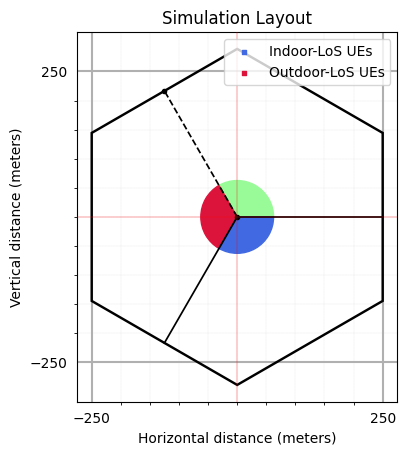

In [8]:
# Layout Parameters
isd             = 500         # inter site distance
minDist         = 35          # min distance between each UE and BS 
ueHt            = 1.5         # UE height
bsHt            = 35          # BS height
topology        = "Hexagonal" # BS layout type
nSectorsPerSite = 3           # number of sectors per site

memoryEfficient                = False
enableSpatialConsistencyLoS    = True
enableSpatialConsistencyIndoor = True


print("      enableSpatialConsistency: "+str(enableSpatialConsistencyLoS))    
print("               memoryEfficient: "+str(memoryEfficient))    
print("enableSpatialConsistencyIndoor: "+str(enableSpatialConsistencyIndoor))    

# simulation layout object                                 
simLayoutObj = SimulationLayout(numOfBS = nBSs, 
                                numOfUE = nUEs,
                                heightOfBS = bsHt, 
                                heightOfUE = ueHt,
                                ISD = isd, 
                                layoutType = topology, 
                                numOfSectorsPerSite = nSectorsPerSite,
                                ueRoute = UEroute,
                                bsRoute = BSroute,
                                memoryEfficient = memoryEfficient,
                                useInitueLocations= True,
                                enableSpatialConsistencyLoS = enableSpatialConsistencyLoS, 
                                enableSpatialConsistencyIndoor = enableSpatialConsistencyIndoor) 

# Update UE location for motion over a circle centered around the BS location.
simLayoutObj.UELocations = -simLayoutObj.UEtracks.mean(0)

simLayoutObj(terrain = propTerrain,
             carrierFreq = carrierFrequency,
             ueAntennaArray = ueAntArray,
             bsAntennaArray = bsAntArray,
             forceLOS = False)

# displaying the topology of simulation layout

fig, ax = simLayoutObj.display2DTopology()

ax.scatter(simLayoutObj.UELocations[0,0]+simLayoutObj.UEtracks[:,0,0], 
           simLayoutObj.UELocations[0,1]+simLayoutObj.UEtracks[:,0,1],  
           color="k", label = "NLoS Instants", zorder=-1)
ax.scatter(simLayoutObj.UELocations[0,0]+simLayoutObj.UEtracks[simLayoutObj.linkState[:,0,3],0,0],
           simLayoutObj.UELocations[0,1]+simLayoutObj.UEtracks[simLayoutObj.linkState[:,0,3],0,1],  
           color="r", label = "LoS Instants", zorder=-1)
ax.scatter(simLayoutObj.UELocations[0,0],simLayoutObj.UELocations[0,1], color="b", label = "UE-InitialLocation", zorder=-3)
ax.set_xlabel("x-coordinates (m)")
ax.set_ylabel("y-coordinates (m)")
ax.set_title("Simulation Topology")
ax.legend()
# plt.show()

## Channel Parameters,  Channel Coefficients and OFDM Channel

The user can access the channel coefficents and other parameters using following handles:

- LSPs/SSPs: paramGenObj.x where x is
    - ``linkStateVec``
    - ``delaySpread``
    - ``phiAoA_LoS``, ``phiAoA_mn``, ``phiAoA_spread``
    - ``thetaAoA_LoS``, ``thetaAoA_mn``, ``thetaAoA_spread``
    - ``phiAoD_LoS``, ``phiAoD_mn``, ``phiAoD_spread``
    - ``thetaAoD_LoS``, ``thetaAoD_mn``, ``thetaAoD_spread``
    - ``xpr``
    - ``pathloss``, ``pathDelay``, ``pathPower``
    - ``shadowFading``
    
- Channel Co-efficeints: channel.x where x is
    - ``coefficients`` 
    - ``delays``

- Shape of OFDM Channel:
    - `Hf` is of shape : ``(number of carrier frequencies, number of snapshots, number of BSs, number of UEs, Nfft, number of Rx antennas, number of Tx antennas)``

In [9]:
# Generate SSPs/LSPs Parameters: 
paramGenObj = simLayoutObj.getParameterGenerator(memoryEfficient = True, 
                                                 enableSpatialConsistencyForLSPs = True, 
                                                 enableSpatialConsistencyForSSPs = True,
                                                 enableSpatialConsistencyForInitialPhases = True)

# Generate Channel Coefficeints and Delays: SSPs/LSPs
channel = paramGenObj.getChannel(applyPathLoss = True)
# Channel coefficients can be accessed using: channel.coefficients
# Channel delays can be accessed using:       channel.delays

# Generate OFDM Channel
Nfft = 1024
Hf   = channel.ofdm(30*10**3, Nfft, simLayoutObj.carrierFrequency)

[Warning]: Pathloss model for UMi is defined only for BS height 'hBS' = 10! Ignoring for now but might results in unexpected behaviour!
[Warning]: UE height 'hUE' cannot be less than 1.5! These values are forced to 1.5!
[Warning]: Pathloss model for UMi is defined only for  2D distances 'd2D' between 10m and 5Km! Some distances are from outside this interval!
Ignoring for now but might result in unexpected behaviour!


In [10]:
Hf.shape

(1, 14, 3, 10, 1024, 4, 4)

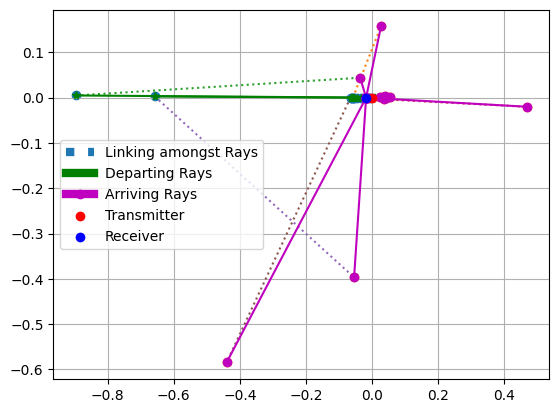

In [11]:
fig, ax = paramGenObj.displayClusters(indices=(0, 1, 0), rayIndex=1, carrierIndex=0, 
                                      radiusRx=10, radiusTx=10, displayPlot=False)

## Variation in Channel Power across Time

* The following code snippets displays the variation of received power of a UE when moves on a circular track (centered around origin) starting from its `initial position`.
* In the current simulation we have 3 BSs and 1 UE moving on a circular track starting from a random intitial position inside a hexagonal layout.

In [12]:
fig, ax = plt.subplots(figsize = (10,4))
power   = 10*np.log10(((np.abs(Hf)**2).sum(axis=0).sum(axis=2).sum(axis=2).sum(axis=2).sum(axis=2))/(nr*nt))
colors  = np.array(['palegreen', 'crimson','royalblue'])
ax.plot(timeInst*1000, power[:,0], colors[0], label = "BS-0")
ax.plot(timeInst*1000, power[:,1], colors[1], label = "BS-1")
ax.plot(timeInst*1000, power[:,2], colors[2], label = "BS-2")

ax.set_xticks(timeInst*1000)
ax.legend()
ax.grid()
ax.set_xlabel('Time Instances (milli-second)')
ax.set_ylabel('Received-Power (dB)')
ax.set_title('Received-Power Variation With Time', fontsize=12)

plt.show()